In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, _), (x_test, _)= fashion_mnist.load_data()

Autoencoder'larda y_train ve y_test'e ihtiyaç yoktur çünkü unsupervised leraning modeli geliştireceğiz. Bu yüzden dataset'i yüklerken y_train ve y_test yerine "_" işareti koyarak bu işaretin tuttuğu veriyi kullanmadığımızı belirtiyoruz. 

In [3]:
x_train = x_train.astype("float32") / 255.0
x_test= x_test.astype("float32") /255.0

In [4]:
x_train = x_train.reshape((len(x_train),x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape((len(x_test),x_test.shape[1]*x_test.shape[2]))

In [5]:
# keras ile eğitim yapabilmek için tek vektör haline çevirdik boyutu
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


<function matplotlib.pyplot.show(close=None, block=None)>

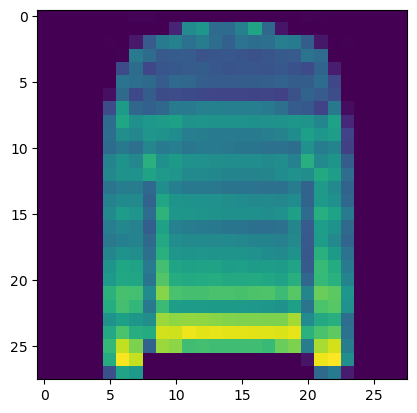

In [6]:
# görselleştirmek istersek 28*28 haline geri çevirmemiz gerekir
plt.imshow(x_train[260].reshape(28,28))
plt.show

In [7]:
input_img= Input(shape=(784,))
encoded = Dense(32, activation="relu")(input_img)
encoded= Dense(16, activation="relu")(encoded)

decoded= Dense(32, activation="relu")(encoded)
output_img= Dense(784,activation="sigmoid")(decoded)

autoencoder = Model(input_img, output_img)

autoencoder.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics= ["accuracy"])

In [8]:
# unsupervised learining yapıldığı için input ve output aynı oluyor "x_train"
hist= autoencoder.fit(x_train,
                      x_train,
                      epochs=200, 
                      batch_size=256, 
                      shuffle=True, 
                      validation_data= (x_train,x_train))

Epoch 1/200
235/235 [==============================] - 4s 14ms/step - loss: 0.4044 - accuracy: 0.0087 - val_loss: 0.3481 - val_accuracy: 0.0073
Epoch 2/200
235/235 [==============================] - 3s 11ms/step - loss: 0.3364 - accuracy: 0.0108 - val_loss: 0.3289 - val_accuracy: 0.0139
Epoch 3/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3240 - accuracy: 0.0136 - val_loss: 0.3236 - val_accuracy: 0.0101
Epoch 4/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3186 - accuracy: 0.0138 - val_loss: 0.3172 - val_accuracy: 0.0171
Epoch 5/200
235/235 [==============================] - 3s 11ms/step - loss: 0.3148 - accuracy: 0.0138 - val_loss: 0.3115 - val_accuracy: 0.0117
Epoch 6/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3119 - accuracy: 0.0137 - val_loss: 0.3094 - val_accuracy: 0.0148
Epoch 7/200
235/235 [==============================] - 3s 12ms/step - loss: 0.3094 - accuracy: 0.0138 - val_loss: 0.3118 - val_accuracy:

235/235 [==============================] - 3s 12ms/step - loss: 0.2899 - accuracy: 0.0197 - val_loss: 0.2903 - val_accuracy: 0.0202
Epoch 58/200
235/235 [==============================] - 4s 15ms/step - loss: 0.2898 - accuracy: 0.0200 - val_loss: 0.2896 - val_accuracy: 0.0194
Epoch 59/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2897 - accuracy: 0.0190 - val_loss: 0.2891 - val_accuracy: 0.0186
Epoch 60/200
235/235 [==============================] - 4s 15ms/step - loss: 0.2897 - accuracy: 0.0195 - val_loss: 0.2893 - val_accuracy: 0.0255
Epoch 61/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2896 - accuracy: 0.0195 - val_loss: 0.2899 - val_accuracy: 0.0168
Epoch 62/200
235/235 [==============================] - 4s 15ms/step - loss: 0.2895 - accuracy: 0.0204 - val_loss: 0.2895 - val_accuracy: 0.0197
Epoch 63/200
235/235 [==============================] - 3s 11ms/step - loss: 0.2895 - accuracy: 0.0201 - val_loss: 0.2891 - val_accuracy: 0.021

235/235 [==============================] - 4s 15ms/step - loss: 0.2878 - accuracy: 0.0202 - val_loss: 0.2890 - val_accuracy: 0.0218
Epoch 114/200
235/235 [==============================] - 3s 15ms/step - loss: 0.2878 - accuracy: 0.0201 - val_loss: 0.2875 - val_accuracy: 0.0177
Epoch 115/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2878 - accuracy: 0.0205 - val_loss: 0.2875 - val_accuracy: 0.0201
Epoch 116/200
235/235 [==============================] - 4s 16ms/step - loss: 0.2877 - accuracy: 0.0210 - val_loss: 0.2881 - val_accuracy: 0.0246
Epoch 117/200
235/235 [==============================] - 3s 13ms/step - loss: 0.2877 - accuracy: 0.0198 - val_loss: 0.2880 - val_accuracy: 0.0224
Epoch 118/200
235/235 [==============================] - 3s 14ms/step - loss: 0.2877 - accuracy: 0.0203 - val_loss: 0.2879 - val_accuracy: 0.0216
Epoch 119/200
235/235 [==============================] - 4s 16ms/step - loss: 0.2877 - accuracy: 0.0206 - val_loss: 0.2886 - val_accuracy:

235/235 [==============================] - 3s 12ms/step - loss: 0.2870 - accuracy: 0.0215 - val_loss: 0.2863 - val_accuracy: 0.0214
Epoch 170/200
235/235 [==============================] - 4s 16ms/step - loss: 0.2870 - accuracy: 0.0216 - val_loss: 0.2872 - val_accuracy: 0.0221
Epoch 171/200
235/235 [==============================] - 4s 15ms/step - loss: 0.2870 - accuracy: 0.0209 - val_loss: 0.2873 - val_accuracy: 0.0203
Epoch 172/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2870 - accuracy: 0.0224 - val_loss: 0.2875 - val_accuracy: 0.0216
Epoch 173/200
235/235 [==============================] - 4s 16ms/step - loss: 0.2870 - accuracy: 0.0214 - val_loss: 0.2869 - val_accuracy: 0.0213
Epoch 174/200
235/235 [==============================] - 4s 16ms/step - loss: 0.2869 - accuracy: 0.0215 - val_loss: 0.2872 - val_accuracy: 0.0221
Epoch 175/200
235/235 [==============================] - 3s 12ms/step - loss: 0.2869 - accuracy: 0.0213 - val_loss: 0.2868 - val_accuracy:

In [9]:
autoencoder.save_weights("autoencoder_model.h5")

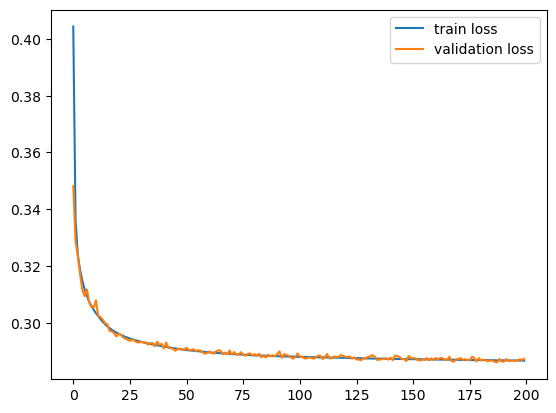

In [10]:
plt.plot(hist.history["loss"], label= "train loss")
plt.plot(hist.history["val_loss"], label= "validation loss")
plt.legend()
plt.show()

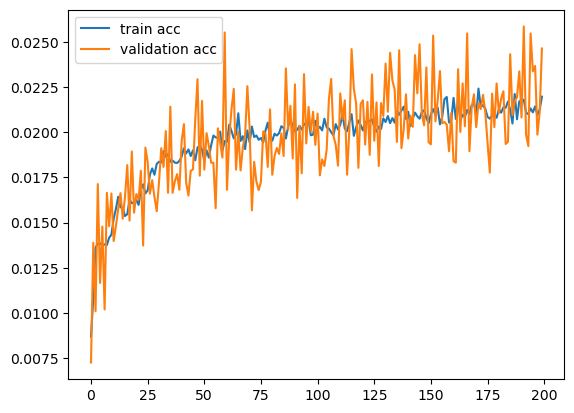

In [11]:
plt.plot(hist.history["accuracy"], label= "train acc")
plt.plot(hist.history["val_accuracy"], label= "validation acc")
plt.legend()
plt.show()

In [12]:
# save hist
with open("autoencoders_history.json","w") as f:
    json.dump(hist.history,f)

In [22]:
"""
with codecs.open("autoencoders_history.json","r", encoding="utf-8") as f:
    n= json.loads(f.read())
    
plt.plot(n["loss"], label="training loss")
plt.plot(n["val_loss"], label="validation loss")
plt.legend()
plt.show()


plt.plot(n["accuracy"], label="training accuraccy")
plt.plot(n["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()
"""

'\nwith codecs.open("autoencoders_history.json","r", encoding="utf-8") as f:\n    n= json.loads(f.read())\n    \nplt.plot(n["loss"], label="training loss")\nplt.plot(n["val_loss"], label="validation loss")\nplt.legend()\nplt.show()\n\n\nplt.plot(n["accuracy"], label="training accuraccy")\nplt.plot(n["val_accuracy"], label="validation accuracy")\nplt.legend()\nplt.show()\n'

### Prediction

In [16]:
encoder= Model(input_img, encoded)
encoded_img= encoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


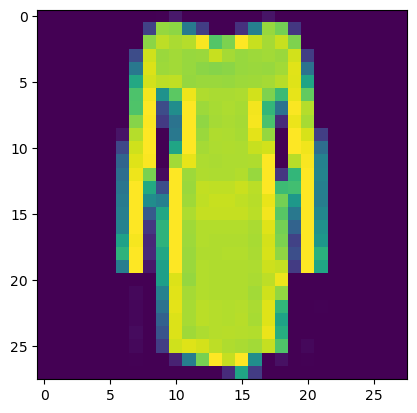

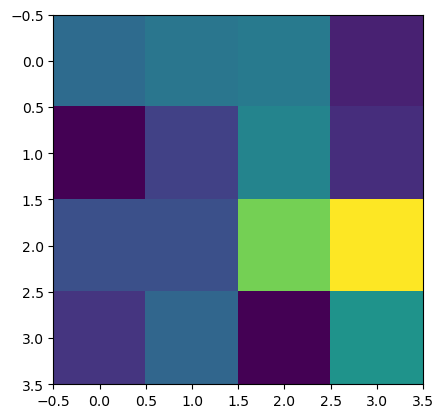

In [20]:
plt.imshow(x_test[1500].reshape(28,28))
plt.show()
plt.figure()
plt.imshow(encoded_img[1500].reshape(4,4))
plt.show()

313/313 [==============================] - 1s 3ms/step


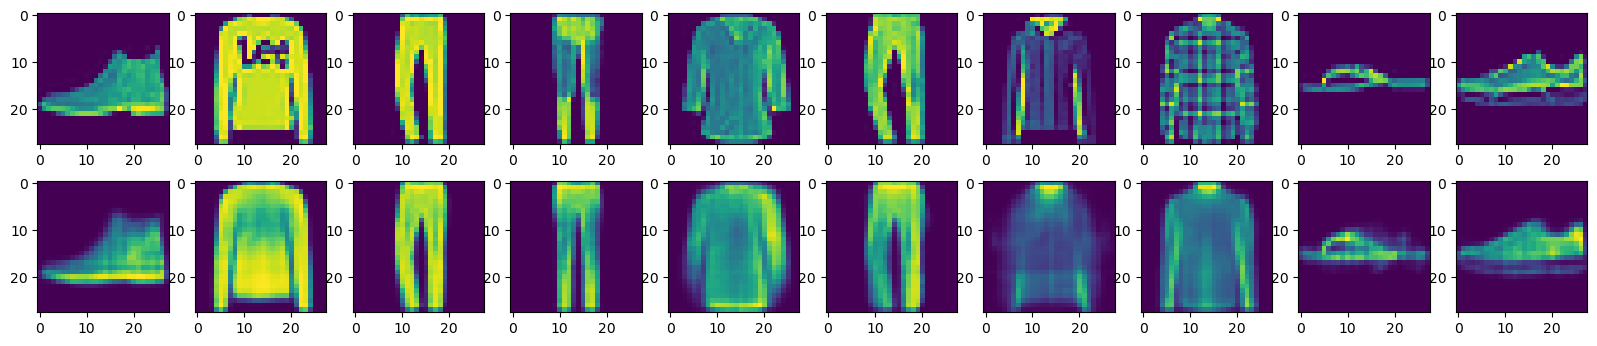

In [21]:
decoded_imgs= autoencoder.predict(x_test)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax=plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    
    ax= plt.subplot(2,n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
plt.show()